In [1]:
import pandas as pd

# Load the CSV file
labels_csv_path =  r'C:\Users\sebas\OneDrive\Desktop\SEP 769\dad-master\dad-master\capture_1910260000_labels.csv'
labels_data = pd.read_csv(labels_csv_path, delimiter=';')

# Print the columns of the dataset
print(labels_data.columns)


C:\Users\sebas\anaconda3\envs\tensorflowgpu\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\sebas\anaconda3\envs\tensorflowgpu\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\sebas\anaconda3\envs\tensorflowgpu\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


Index(['frame.number', 'ip.src', 'tcp.srcport', 'mqtt.clientid', 'mqtt.msgid',
       'label'],
      dtype='object')


In [ ]:
# Mon 21st 

Anomaly Detection Report
Total Anomalies: 0

Anomaly Frequency by Hour:
Series([], Name: count, dtype: int64)

Morning Anomalies (6-7 AM): 0
Afternoon Anomalies (2-4 PM): 0


C:\Users\sebas\AppData\Local\Temp\ipykernel_42180\1728633443.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['mqtt.clientid'].fillna(0, inplace=True)
C:\Users\sebas\AppData\Local\Temp\ipykernel_42180\1728633443.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

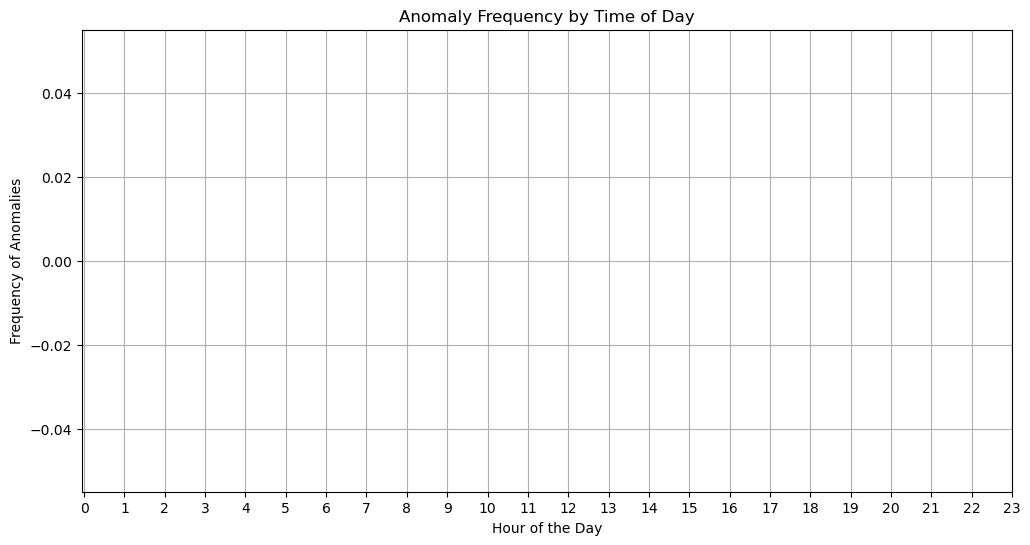

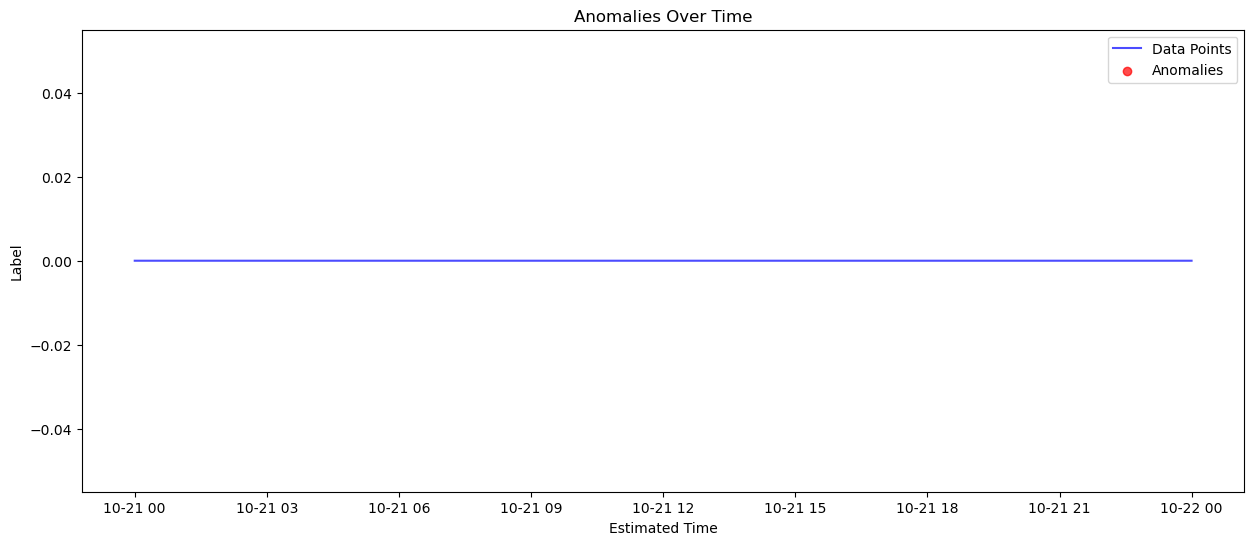

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Preprocess the data
def preprocess_data(data):
    data['mqtt.clientid'].fillna(0, inplace=True)
    data['mqtt.msgid'].fillna(0, inplace=True)

    # One-hot encode the 'ip.src' column
    encoder = OneHotEncoder()
    
    ip_encoded = encoder.fit_transform(data[['ip.src']]).toarray()
    ip_encoded_df = pd.DataFrame(ip_encoded, columns=encoder.get_feature_names_out(['ip.src']))

    # Normalize other numerical columns
    scaler = StandardScaler()
    data[['tcp.srcport', 'mqtt.clientid', 'mqtt.msgid']] = scaler.fit_transform(data[['tcp.srcport', 'mqtt.clientid', 'mqtt.msgid']])
    
    # Convert label to categorical
    data['label'] = data['label'].astype(int)
    labels = to_categorical(data['label'])
    
    # Combine encoded IP addresses with the rest of the data
    features = pd.concat([data.drop(['ip.src', 'label'], axis=1), ip_encoded_df], axis=1)
    
    return features, labels

# Load the CSV file
labels_csv_path = r'C:\Users\sebas\OneDrive\Desktop\SEP 769\dad-master\dad-master\capture_1910210000_labels.csv'
labels_data = pd.read_csv(labels_csv_path, delimiter=';')
processed_features, processed_labels = preprocess_data(labels_data)

# Estimate the time for each row assuming a single day dataset
def estimate_times(data):
    total_seconds_per_day = 24 * 60 * 60
    rows_per_day = len(data)
    seconds_per_row = total_seconds_per_day / rows_per_day
    start_time = datetime(2023, 10, 21)  # Assuming the start date of the capture is October 21, 2023
    data['estimated_time'] = [start_time + timedelta(seconds=i * seconds_per_row) for i in range(len(data))]
    return data

labels_data = estimate_times(labels_data)

# Generate detailed anomaly detection report
def generate_anomaly_report(data):
    # Identify anomalies
    data['hour'] = data['estimated_time'].dt.hour
    anomalies = data[data['label'] != 0]  # Assuming label 0 is normal and other values are anomalies

    # Total number of anomalies
    total_anomalies = len(anomalies)
    
    # Frequency of anomalies by hour
    anomaly_counts = anomalies['hour'].value_counts().sort_index()

    # Summary of anomalies within specific periods
    morning_anomalies = anomalies[(anomalies['hour'] >= 6) & (anomalies['hour'] < 7)]
    afternoon_anomalies = anomalies[(anomalies['hour'] >= 14) & (anomalies['hour'] < 17)]
    
    report = {
        "Total Anomalies": total_anomalies,
        "Anomaly Frequency by Hour": anomaly_counts,
        "Morning Anomalies (6-7 AM)": len(morning_anomalies),
        "Afternoon Anomalies (2-4 PM)": len(afternoon_anomalies)
    }
    
    # Print the report
    print("Anomaly Detection Report")
    print("========================")
    print(f"Total Anomalies: {total_anomalies}")
    print("\nAnomaly Frequency by Hour:")
    print(anomaly_counts)
    print(f"\nMorning Anomalies (6-7 AM): {len(morning_anomalies)}")
    print(f"Afternoon Anomalies (2-4 PM): {len(afternoon_anomalies)}")

    # Plot anomaly frequency by hour
    plt.figure(figsize=(12, 6))
    plt.bar(anomaly_counts.index, anomaly_counts.values, color='red', alpha=0.7)
    plt.xlabel('Hour of the Day')
    plt.ylabel('Frequency of Anomalies')
    plt.title('Anomaly Frequency by Time of Day')
    plt.xticks(np.arange(0, 24, 1))
    plt.grid(True)
    plt.show()

    # Plot anomalies over time
    plt.figure(figsize=(15, 6))
    plt.plot(data['estimated_time'], data['label'], 'b-', alpha=0.7, label='Data Points')
    plt.scatter(anomalies['estimated_time'], anomalies['label'], color='red', label='Anomalies', alpha=0.7)
    plt.xlabel('Estimated Time')
    plt.ylabel('Label')
    plt.title('Anomalies Over Time')
    plt.legend()
    plt.show()

generate_anomaly_report(labels_data)

In [47]:

#Tues 22nd 


Anomaly Detection Report
Total Anomalies: 0

Anomaly Frequency by Hour:
Series([], Name: count, dtype: int64)

Morning Anomalies (6-7 AM): 0
Afternoon Anomalies (2-4 PM): 0


C:\Users\sebas\AppData\Local\Temp\ipykernel_114524\2821031542.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['mqtt.clientid'].fillna(0, inplace=True)
C:\Users\sebas\AppData\Local\Temp\ipykernel_114524\2821031542.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

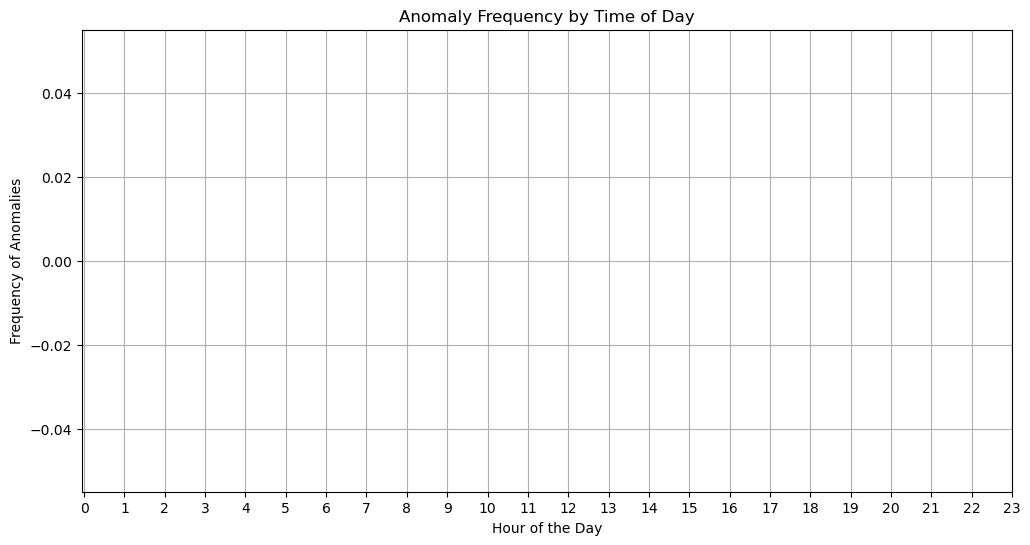

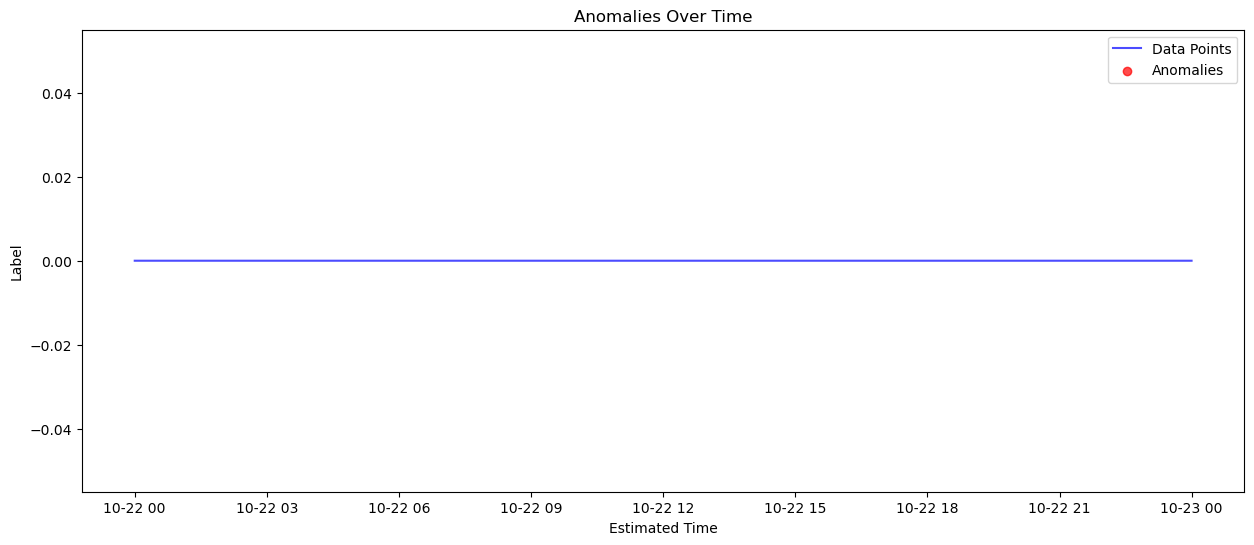

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Preprocess the data
def preprocess_data(data):
    data['mqtt.clientid'].fillna(0, inplace=True)
    data['mqtt.msgid'].fillna(0, inplace=True)

    # One-hot encode the 'ip.src' column
    encoder = OneHotEncoder()
    ip_encoded = encoder.fit_transform(data[['ip.src']]).toarray()
    ip_encoded_df = pd.DataFrame(ip_encoded, columns=encoder.get_feature_names_out(['ip.src']))

    # Normalize other numerical columns
    scaler = StandardScaler()
    data[['tcp.srcport', 'mqtt.clientid', 'mqtt.msgid']] = scaler.fit_transform(data[['tcp.srcport', 'mqtt.clientid', 'mqtt.msgid']])
    
    # Convert label to categorical
    data['label'] = data['label'].astype(int)
    labels = to_categorical(data['label'])
    
    # Combine encoded IP addresses with the rest of the data
    features = pd.concat([data.drop(['ip.src', 'label'], axis=1), ip_encoded_df], axis=1)
    
    return features, labels

# Load the CSV file
labels_csv_path = r'C:\Users\sebas\OneDrive\Desktop\SEP 769\dad-master\dad-master\capture_1910220000_labels.csv'
labels_data = pd.read_csv(labels_csv_path, delimiter=';')
processed_features, processed_labels = preprocess_data(labels_data)

# Estimate the time for each row assuming a single day dataset
def estimate_times(data):
    total_seconds_per_day = 24 * 60 * 60
    rows_per_day = len(data)
    seconds_per_row = total_seconds_per_day / rows_per_day
    start_time = datetime(2023, 10, 27)  # Assuming the start date of the capture is October 27, 2023
    data['estimated_time'] = [start_time + timedelta(seconds=i * seconds_per_row) for i in range(len(data))]
    return data

labels_data = estimate_times(labels_data)

# Generate detailed anomaly detection report
def generate_anomaly_report(data):
    # Identify anomalies
    data['hour'] = data['estimated_time'].dt.hour
    anomalies = data[data['label'] != 0]  # Assuming label 0 is normal and other values are anomalies

    # Total number of anomalies
    total_anomalies = len(anomalies)
    
    # Frequency of anomalies by hour
    anomaly_counts = anomalies['hour'].value_counts().sort_index()

    # Summary of anomalies within specific periods
    morning_anomalies = anomalies[(anomalies['hour'] >= 6) & (anomalies['hour'] < 7)]
    afternoon_anomalies = anomalies[(anomalies['hour'] >= 14) & (anomalies['hour'] < 17)]
    
    report = {
        "Total Anomalies": total_anomalies,
        "Anomaly Frequency by Hour": anomaly_counts,
        "Morning Anomalies (6-7 AM)": len(morning_anomalies),
        "Afternoon Anomalies (2-4 PM)": len(afternoon_anomalies)
    }
    
    # Print the report
    print("Anomaly Detection Report")
    print("========================")
    print(f"Total Anomalies: {total_anomalies}")
    print("\nAnomaly Frequency by Hour:")
    print(anomaly_counts)
    print(f"\nMorning Anomalies (6-7 AM): {len(morning_anomalies)}")
    print(f"Afternoon Anomalies (2-4 PM): {len(afternoon_anomalies)}")

    # Plot anomaly frequency by hour
    plt.figure(figsize=(12, 6))
    plt.bar(anomaly_counts.index, anomaly_counts.values, color='red', alpha=0.7)
    plt.xlabel('Hour of the Day')
    plt.ylabel('Frequency of Anomalies')
    plt.title('Anomaly Frequency by Time of Day')
    plt.xticks(np.arange(0, 24, 1))
    plt.grid(True)
    plt.show()

    # Plot anomalies over time
    plt.figure(figsize=(15, 6))
    plt.plot(data['estimated_time'], data['label'], 'b-', alpha=0.7, label='Data Points')
    plt.scatter(anomalies['estimated_time'], anomalies['label'], color='red', label='Anomalies', alpha=0.7)
    plt.xlabel('Estimated Time')
    plt.ylabel('Label')
    plt.title('Anomalies Over Time')
    plt.legend()
    plt.show()

generate_anomaly_report(labels_data)

In [ ]:
# Wed 23rd 

Anomaly Detection Report
Total Anomalies: 104

Anomaly Frequency by Hour:
hour
4    28
5    48
6    28
Name: count, dtype: int64

Morning Anomalies (6-7 AM): 28
Afternoon Anomalies (2-4 PM): 0


C:\Users\sebas\AppData\Local\Temp\ipykernel_114524\3792734079.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['mqtt.clientid'].fillna(0, inplace=True)
C:\Users\sebas\AppData\Local\Temp\ipykernel_114524\3792734079.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

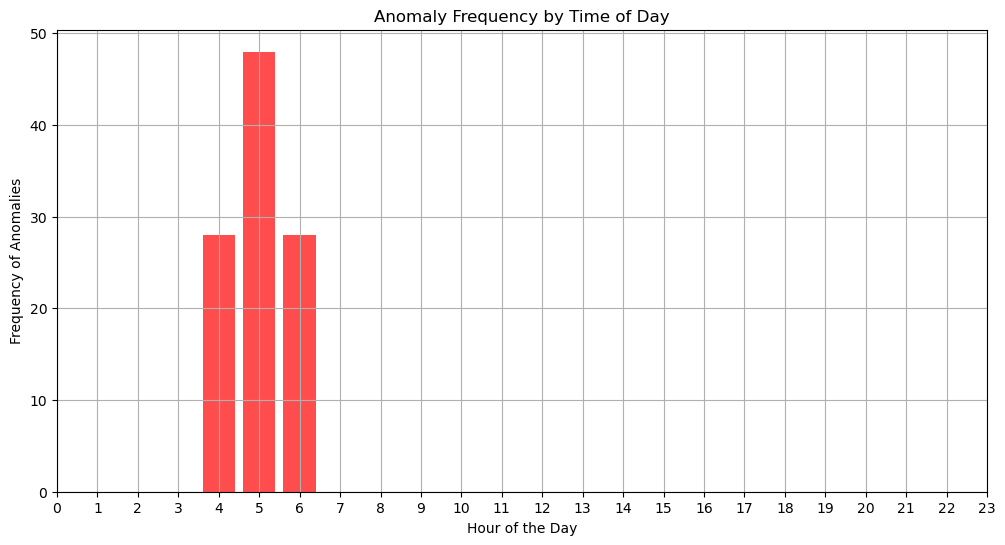

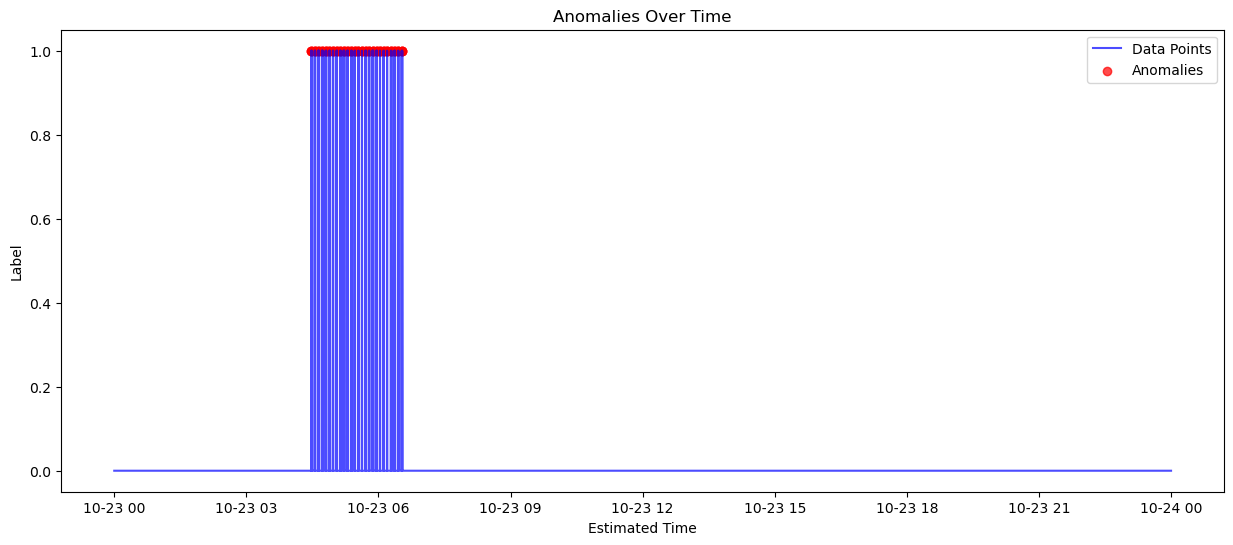

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Preprocess the data
def preprocess_data(data):
    data['mqtt.clientid'].fillna(0, inplace=True)
    data['mqtt.msgid'].fillna(0, inplace=True)

    # One-hot encode the 'ip.src' column
    encoder = OneHotEncoder()
    ip_encoded = encoder.fit_transform(data[['ip.src']]).toarray()
    ip_encoded_df = pd.DataFrame(ip_encoded, columns=encoder.get_feature_names_out(['ip.src']))

    # Normalize other numerical columns
    scaler = StandardScaler()
    data[['tcp.srcport', 'mqtt.clientid', 'mqtt.msgid']] = scaler.fit_transform(data[['tcp.srcport', 'mqtt.clientid', 'mqtt.msgid']])
    
    # Convert label to categorical
    data['label'] = data['label'].astype(int)
    labels = to_categorical(data['label'])
    
    # Combine encoded IP addresses with the rest of the data
    features = pd.concat([data.drop(['ip.src', 'label'], axis=1), ip_encoded_df], axis=1)
    
    return features, labels

# Load the CSV file
labels_csv_path = r'C:\Users\sebas\OneDrive\Desktop\SEP 769\dad-master\dad-master\capture_1910230000_labels.csv'
labels_data = pd.read_csv(labels_csv_path, delimiter=';')
processed_features, processed_labels = preprocess_data(labels_data)

# Estimate the time for each row assuming a single day dataset
def estimate_times(data):
    total_seconds_per_day = 24 * 60 * 60
    rows_per_day = len(data)
    seconds_per_row = total_seconds_per_day / rows_per_day
    start_time = datetime(2023, 10, 23)  # Assuming the start date of the capture is October 23, 2023
    data['estimated_time'] = [start_time + timedelta(seconds=i * seconds_per_row) for i in range(len(data))]
    return data

labels_data = estimate_times(labels_data)

# Generate detailed anomaly detection report
def generate_anomaly_report(data):
    # Identify anomalies
    data['hour'] = data['estimated_time'].dt.hour
    anomalies = data[data['label'] != 0]  # Assuming label 0 is normal and other values are anomalies

    # Total number of anomalies
    total_anomalies = len(anomalies)
    
    # Frequency of anomalies by hour
    anomaly_counts = anomalies['hour'].value_counts().sort_index()

    # Summary of anomalies within specific periods
    morning_anomalies = anomalies[(anomalies['hour'] >= 6) & (anomalies['hour'] < 7)]
    afternoon_anomalies = anomalies[(anomalies['hour'] >= 14) & (anomalies['hour'] < 17)]
    
    report = {
        "Total Anomalies": total_anomalies,
        "Anomaly Frequency by Hour": anomaly_counts,
        "Morning Anomalies (6-7 AM)": len(morning_anomalies),
        "Afternoon Anomalies (2-4 PM)": len(afternoon_anomalies)
    }
    
    # Print the report
    print("Anomaly Detection Report")
    print("========================")
    print(f"Total Anomalies: {total_anomalies}")
    print("\nAnomaly Frequency by Hour:")
    print(anomaly_counts)
    print(f"\nMorning Anomalies (6-7 AM): {len(morning_anomalies)}")
    print(f"Afternoon Anomalies (2-4 PM): {len(afternoon_anomalies)}")

    # Plot anomaly frequency by hour
    plt.figure(figsize=(12, 6))
    plt.bar(anomaly_counts.index, anomaly_counts.values, color='red', alpha=0.7)
    plt.xlabel('Hour of the Day')
    plt.ylabel('Frequency of Anomalies')
    plt.title('Anomaly Frequency by Time of Day')
    plt.xticks(np.arange(0, 24, 1))
    plt.grid(True)
    plt.show()

    # Plot anomalies over time
    plt.figure(figsize=(15, 6))
    plt.plot(data['estimated_time'], data['label'], 'b-', alpha=0.7, label='Data Points')
    plt.scatter(anomalies['estimated_time'], anomalies['label'], color='red', label='Anomalies', alpha=0.7)
    plt.xlabel('Estimated Time')
    plt.ylabel('Label')
    plt.title('Anomalies Over Time')
    plt.legend()
    plt.show()

generate_anomaly_report(labels_data)

In [ ]:
#Thurs 24 

Anomaly Detection Report
Total Anomalies: 56

Anomaly Frequency by Hour:
hour
3    56
Name: count, dtype: int64

Morning Anomalies (6-7 AM): 0
Afternoon Anomalies (2-4 PM): 0


C:\Users\sebas\AppData\Local\Temp\ipykernel_114524\3468325540.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['mqtt.clientid'].fillna(0, inplace=True)
C:\Users\sebas\AppData\Local\Temp\ipykernel_114524\3468325540.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

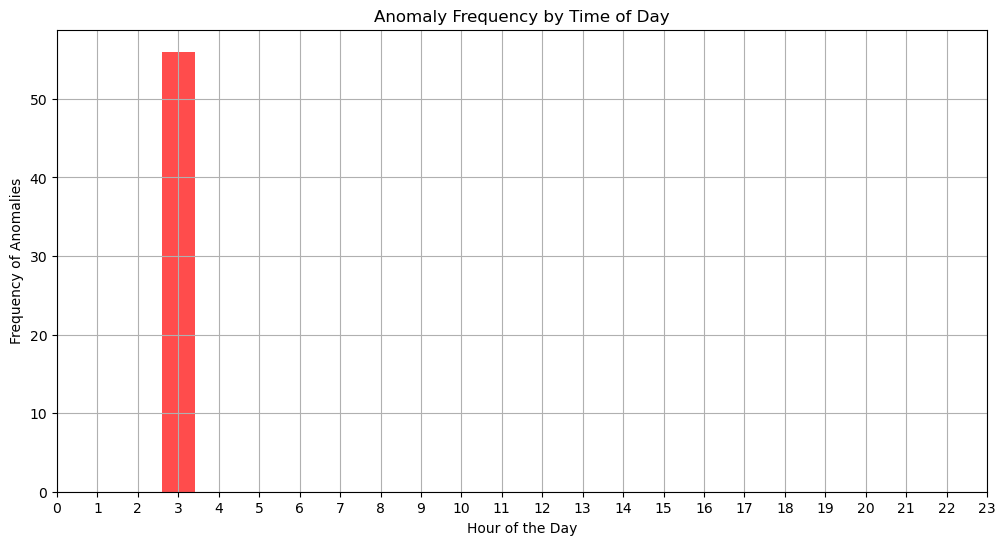

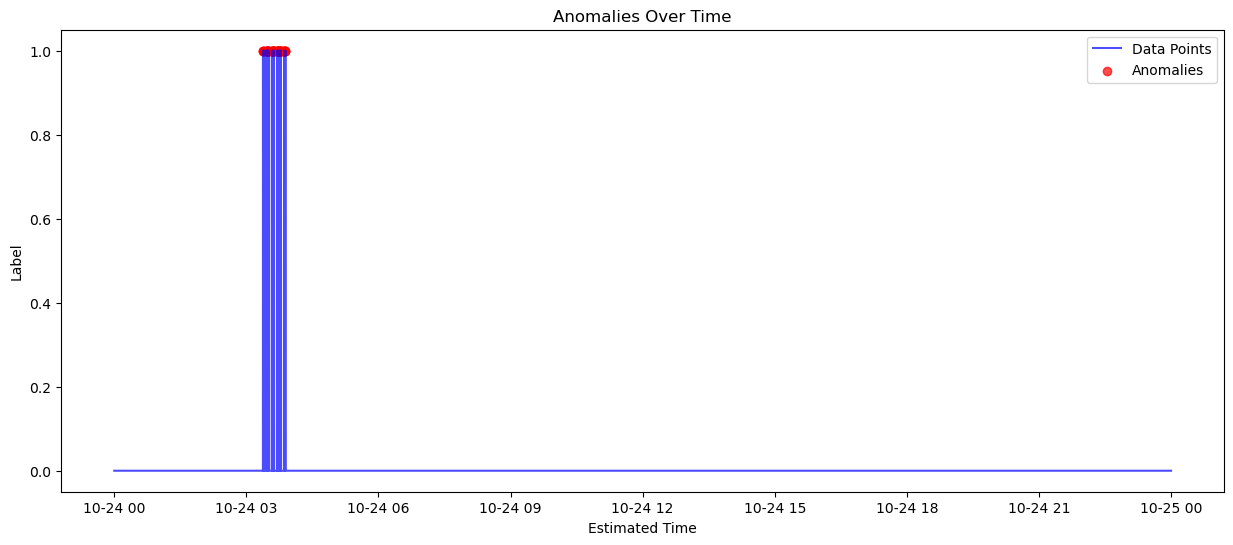

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Preprocess the data
def preprocess_data(data):
    data['mqtt.clientid'].fillna(0, inplace=True)
    data['mqtt.msgid'].fillna(0, inplace=True)

    # One-hot encode the 'ip.src' column
    encoder = OneHotEncoder()
    ip_encoded = encoder.fit_transform(data[['ip.src']]).toarray()
    ip_encoded_df = pd.DataFrame(ip_encoded, columns=encoder.get_feature_names_out(['ip.src']))

    # Normalize other numerical columns
    scaler = StandardScaler()
    data[['tcp.srcport', 'mqtt.clientid', 'mqtt.msgid']] = scaler.fit_transform(data[['tcp.srcport', 'mqtt.clientid', 'mqtt.msgid']])
    
    # Convert label to categorical
    data['label'] = data['label'].astype(int)
    labels = to_categorical(data['label'])
    
    # Combine encoded IP addresses with the rest of the data
    features = pd.concat([data.drop(['ip.src', 'label'], axis=1), ip_encoded_df], axis=1)
    
    return features, labels

# Load the CSV file
labels_csv_path = r'C:\Users\sebas\OneDrive\Desktop\SEP 769\dad-master\dad-master\capture_1910240000_labels.csv'
labels_data = pd.read_csv(labels_csv_path, delimiter=';')
processed_features, processed_labels = preprocess_data(labels_data)

# Estimate the time for each row assuming a single day dataset
def estimate_times(data):
    total_seconds_per_day = 24 * 60 * 60
    rows_per_day = len(data)
    seconds_per_row = total_seconds_per_day / rows_per_day
    start_time = datetime(2023, 10, 24)  # Assuming the start date of the capture is October 24, 2023
    data['estimated_time'] = [start_time + timedelta(seconds=i * seconds_per_row) for i in range(len(data))]
    return data

labels_data = estimate_times(labels_data)

# Generate detailed anomaly detection report
def generate_anomaly_report(data):
    # Identify anomalies
    data['hour'] = data['estimated_time'].dt.hour
    anomalies = data[data['label'] != 0]  # Assuming label 0 is normal and other values are anomalies

    # Total number of anomalies
    total_anomalies = len(anomalies)
    
    # Frequency of anomalies by hour
    anomaly_counts = anomalies['hour'].value_counts().sort_index()

    # Summary of anomalies within specific periods
    morning_anomalies = anomalies[(anomalies['hour'] >= 6) & (anomalies['hour'] < 7)]
    afternoon_anomalies = anomalies[(anomalies['hour'] >= 14) & (anomalies['hour'] < 17)]
    
    report = {
        "Total Anomalies": total_anomalies,
        "Anomaly Frequency by Hour": anomaly_counts,
        "Morning Anomalies (6-7 AM)": len(morning_anomalies),
        "Afternoon Anomalies (2-4 PM)": len(afternoon_anomalies)
    }
    
    # Print the report
    print("Anomaly Detection Report")
    print("========================")
    print(f"Total Anomalies: {total_anomalies}")
    print("\nAnomaly Frequency by Hour:")
    print(anomaly_counts)
    print(f"\nMorning Anomalies (6-7 AM): {len(morning_anomalies)}")
    print(f"Afternoon Anomalies (2-4 PM): {len(afternoon_anomalies)}")

    # Plot anomaly frequency by hour
    plt.figure(figsize=(12, 6))
    plt.bar(anomaly_counts.index, anomaly_counts.values, color='red', alpha=0.7)
    plt.xlabel('Hour of the Day')
    plt.ylabel('Frequency of Anomalies')
    plt.title('Anomaly Frequency by Time of Day')
    plt.xticks(np.arange(0, 24, 1))
    plt.grid(True)
    plt.show()

    # Plot anomalies over time
    plt.figure(figsize=(15, 6))
    plt.plot(data['estimated_time'], data['label'], 'b-', alpha=0.7, label='Data Points')
    plt.scatter(anomalies['estimated_time'], anomalies['label'], color='red', label='Anomalies', alpha=0.7)
    plt.xlabel('Estimated Time')
    plt.ylabel('Label')
    plt.title('Anomalies Over Time')
    plt.legend()
    plt.show()

generate_anomaly_report(labels_data)

In [ ]:
#Friday 25th

Anomaly Detection Report
Total Anomalies: 192

Anomaly Frequency by Hour:
hour
5      7
6     89
14    20
15    48
16    28
Name: count, dtype: int64

Morning Anomalies (6-7 AM): 89
Afternoon Anomalies (2-4 PM): 96


C:\Users\sebas\AppData\Local\Temp\ipykernel_114524\3596530065.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['mqtt.clientid'].fillna(0, inplace=True)
C:\Users\sebas\AppData\Local\Temp\ipykernel_114524\3596530065.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

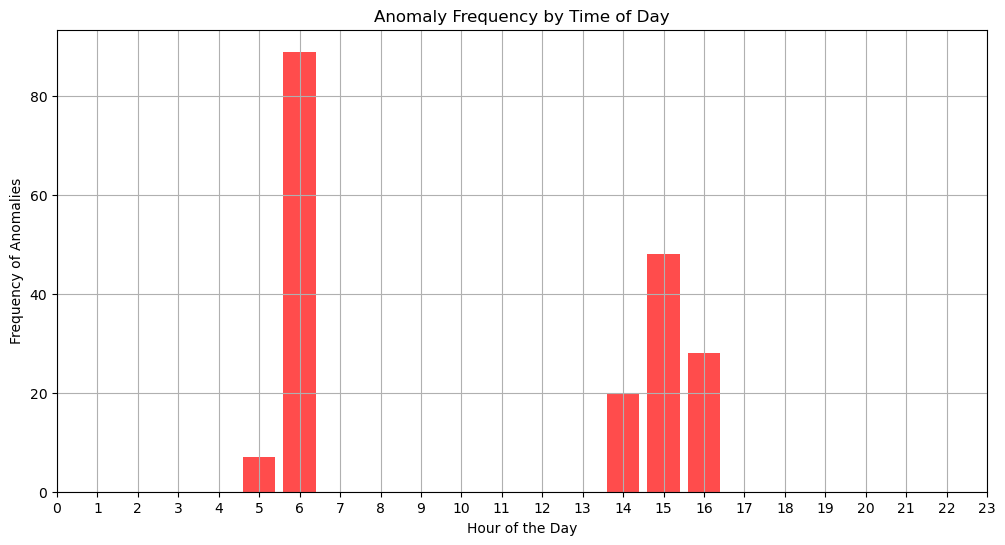

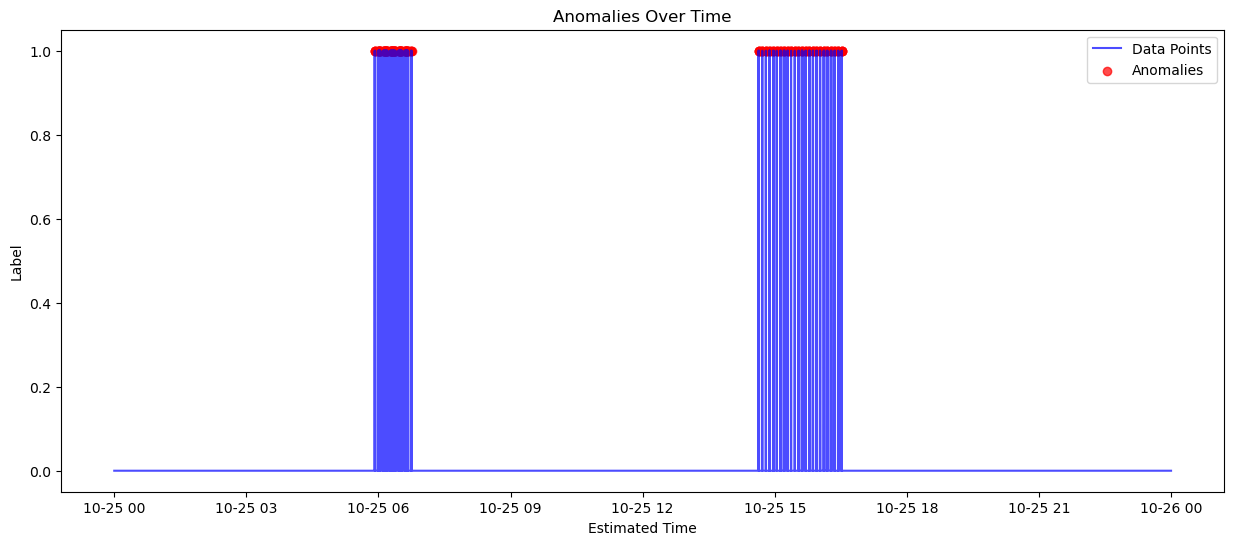

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Preprocess the data
def preprocess_data(data):
    data['mqtt.clientid'].fillna(0, inplace=True)
    data['mqtt.msgid'].fillna(0, inplace=True)

    # One-hot encode the 'ip.src' column
    encoder = OneHotEncoder()
    ip_encoded = encoder.fit_transform(data[['ip.src']]).toarray()
    ip_encoded_df = pd.DataFrame(ip_encoded, columns=encoder.get_feature_names_out(['ip.src']))

    # Normalize other numerical columns
    scaler = StandardScaler()
    data[['tcp.srcport', 'mqtt.clientid', 'mqtt.msgid']] = scaler.fit_transform(data[['tcp.srcport', 'mqtt.clientid', 'mqtt.msgid']])
    
    # Convert label to categorical
    data['label'] = data['label'].astype(int)
    labels = to_categorical(data['label'])
    
    # Combine encoded IP addresses with the rest of the data
    features = pd.concat([data.drop(['ip.src', 'label'], axis=1), ip_encoded_df], axis=1)
    
    return features, labels

# Load the CSV file
labels_csv_path = r'C:\Users\sebas\OneDrive\Desktop\SEP 769\dad-master\dad-master\capture_1910250000_labels.csv'
labels_data = pd.read_csv(labels_csv_path, delimiter=';')
processed_features, processed_labels = preprocess_data(labels_data)

# Estimate the time for each row assuming a single day dataset
def estimate_times(data):
    total_seconds_per_day = 24 * 60 * 60
    rows_per_day = len(data)
    seconds_per_row = total_seconds_per_day / rows_per_day
    start_time = datetime(2023, 10, 25)  # Assuming the start date of the capture is October 25, 2023
    data['estimated_time'] = [start_time + timedelta(seconds=i * seconds_per_row) for i in range(len(data))]
    return data

labels_data = estimate_times(labels_data)

# Generate detailed anomaly detection report
def generate_anomaly_report(data):
    # Identify anomalies
    data['hour'] = data['estimated_time'].dt.hour
    anomalies = data[data['label'] != 0]  # Assuming label 0 is normal and other values are anomalies

    # Total number of anomalies
    total_anomalies = len(anomalies)
    
    # Frequency of anomalies by hour
    anomaly_counts = anomalies['hour'].value_counts().sort_index()

    # Summary of anomalies within specific periods
    morning_anomalies = anomalies[(anomalies['hour'] >= 6) & (anomalies['hour'] < 7)]
    afternoon_anomalies = anomalies[(anomalies['hour'] >= 14) & (anomalies['hour'] < 17)]
    
    report = {
        "Total Anomalies": total_anomalies,
        "Anomaly Frequency by Hour": anomaly_counts,
        "Morning Anomalies (6-7 AM)": len(morning_anomalies),
        "Afternoon Anomalies (2-4 PM)": len(afternoon_anomalies)
    }
    
    # Print the report
    print("Anomaly Detection Report")
    print("========================")
    print(f"Total Anomalies: {total_anomalies}")
    print("\nAnomaly Frequency by Hour:")
    print(anomaly_counts)
    print(f"\nMorning Anomalies (6-7 AM): {len(morning_anomalies)}")
    print(f"Afternoon Anomalies (2-4 PM): {len(afternoon_anomalies)}")

    # Plot anomaly frequency by hour
    plt.figure(figsize=(12, 6))
    plt.bar(anomaly_counts.index, anomaly_counts.values, color='red', alpha=0.7)
    plt.xlabel('Hour of the Day')
    plt.ylabel('Frequency of Anomalies')
    plt.title('Anomaly Frequency by Time of Day')
    plt.xticks(np.arange(0, 24, 1))
    plt.grid(True)
    plt.show()

    # Plot anomalies over time
    plt.figure(figsize=(15, 6))
    plt.plot(data['estimated_time'], data['label'], 'b-', alpha=0.7, label='Data Points')
    plt.scatter(anomalies['estimated_time'], anomalies['label'], color='red', label='Anomalies', alpha=0.7)
    plt.xlabel('Estimated Time')
    plt.ylabel('Label')
    plt.title('Anomalies Over Time')
    plt.legend()
    plt.show()

generate_anomaly_report(labels_data)

In [ ]:
#Sat 26th

Anomaly Detection Report
Total Anomalies: 104

Anomaly Frequency by Hour:
hour
4    28
5    48
6    28
Name: count, dtype: int64

Morning Anomalies (6-7 AM): 28
Afternoon Anomalies (2-4 PM): 0


C:\Users\sebas\AppData\Local\Temp\ipykernel_114524\2604746081.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['mqtt.clientid'].fillna(0, inplace=True)
C:\Users\sebas\AppData\Local\Temp\ipykernel_114524\2604746081.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

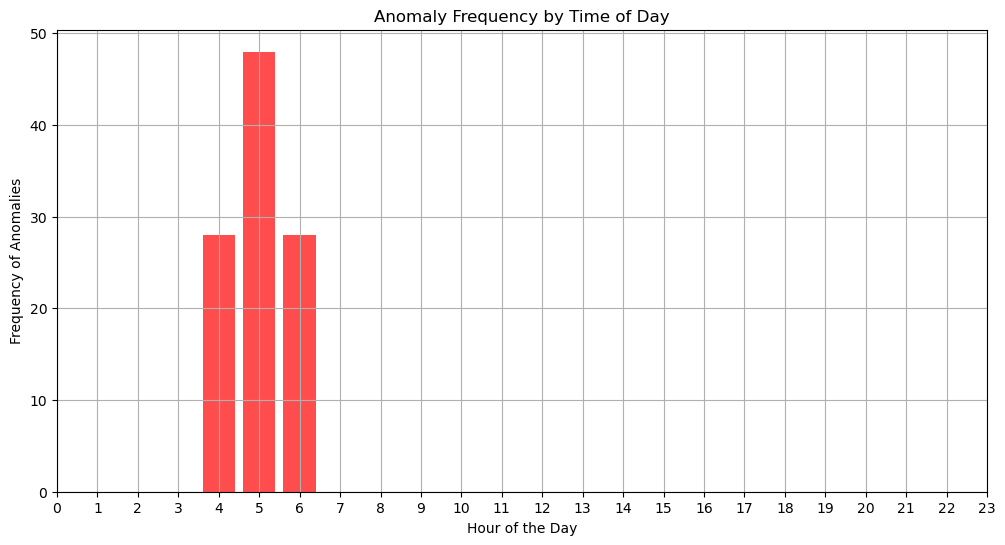

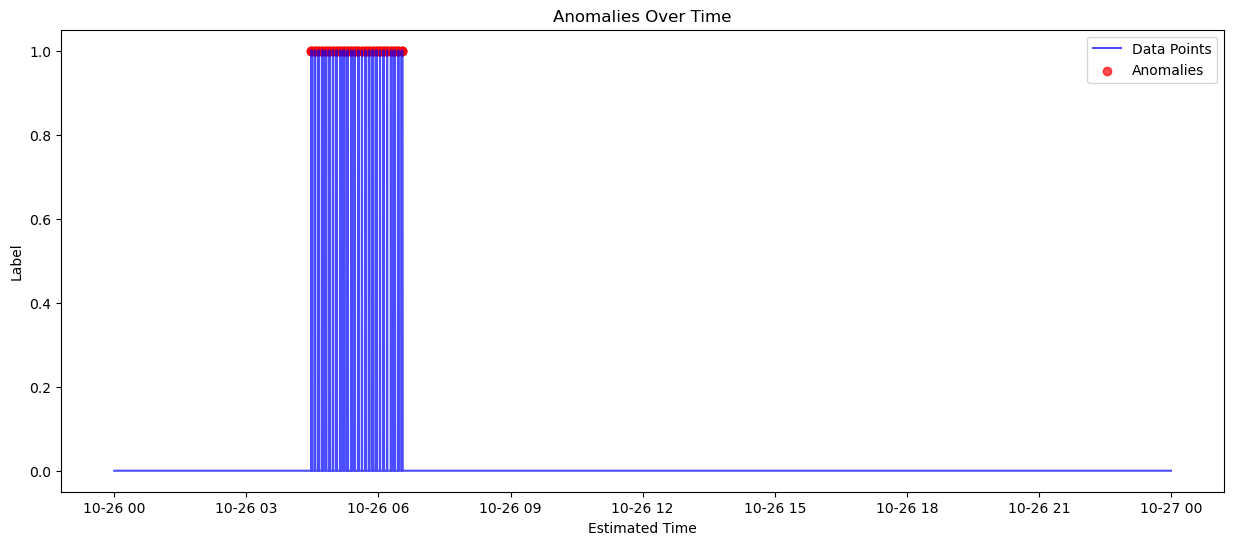

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Preprocess the data
def preprocess_data(data):
    data['mqtt.clientid'].fillna(0, inplace=True)
    data['mqtt.msgid'].fillna(0, inplace=True)

    # One-hot encode the 'ip.src' column
    encoder = OneHotEncoder()
    ip_encoded = encoder.fit_transform(data[['ip.src']]).toarray()
    ip_encoded_df = pd.DataFrame(ip_encoded, columns=encoder.get_feature_names_out(['ip.src']))

    # Normalize other numerical columns
    scaler = StandardScaler()
    data[['tcp.srcport', 'mqtt.clientid', 'mqtt.msgid']] = scaler.fit_transform(data[['tcp.srcport', 'mqtt.clientid', 'mqtt.msgid']])
    
    # Convert label to categorical
    data['label'] = data['label'].astype(int)
    labels = to_categorical(data['label'])
    
    # Combine encoded IP addresses with the rest of the data
    features = pd.concat([data.drop(['ip.src', 'label'], axis=1), ip_encoded_df], axis=1)
    
    return features, labels

# Load the CSV file
labels_csv_path = r'C:\Users\sebas\OneDrive\Desktop\SEP 769\dad-master\dad-master\capture_1910230000_labels.csv'
labels_data = pd.read_csv(labels_csv_path, delimiter=';')
processed_features, processed_labels = preprocess_data(labels_data)

# Estimate the time for each row assuming a single day dataset
def estimate_times(data):
    total_seconds_per_day = 24 * 60 * 60
    rows_per_day = len(data)
    seconds_per_row = total_seconds_per_day / rows_per_day
    start_time = datetime(2023, 10, 26)  # Assuming the start date of the capture is October 26, 2023
    data['estimated_time'] = [start_time + timedelta(seconds=i * seconds_per_row) for i in range(len(data))]
    return data

labels_data = estimate_times(labels_data)

# Generate detailed anomaly detection report
def generate_anomaly_report(data):
    # Identify anomalies
    data['hour'] = data['estimated_time'].dt.hour
    anomalies = data[data['label'] != 0]  # Assuming label 0 is normal and other values are anomalies

    # Total number of anomalies
    total_anomalies = len(anomalies)
    
    # Frequency of anomalies by hour
    anomaly_counts = anomalies['hour'].value_counts().sort_index()

    # Summary of anomalies within specific periods
    morning_anomalies = anomalies[(anomalies['hour'] >= 6) & (anomalies['hour'] < 7)]
    afternoon_anomalies = anomalies[(anomalies['hour'] >= 14) & (anomalies['hour'] < 17)]
    
    report = {
        "Total Anomalies": total_anomalies,
        "Anomaly Frequency by Hour": anomaly_counts,
        "Morning Anomalies (6-7 AM)": len(morning_anomalies),
        "Afternoon Anomalies (2-4 PM)": len(afternoon_anomalies)
    }
    
    # Print the report
    print("Anomaly Detection Report")
    print("========================")
    print(f"Total Anomalies: {total_anomalies}")
    print("\nAnomaly Frequency by Hour:")
    print(anomaly_counts)
    print(f"\nMorning Anomalies (6-7 AM): {len(morning_anomalies)}")
    print(f"Afternoon Anomalies (2-4 PM): {len(afternoon_anomalies)}")

    # Plot anomaly frequency by hour
    plt.figure(figsize=(12, 6))
    plt.bar(anomaly_counts.index, anomaly_counts.values, color='red', alpha=0.7)
    plt.xlabel('Hour of the Day')
    plt.ylabel('Frequency of Anomalies')
    plt.title('Anomaly Frequency by Time of Day')
    plt.xticks(np.arange(0, 24, 1))
    plt.grid(True)
    plt.show()

    # Plot anomalies over time
    plt.figure(figsize=(15, 6))
    plt.plot(data['estimated_time'], data['label'], 'b-', alpha=0.7, label='Data Points')
    plt.scatter(anomalies['estimated_time'], anomalies['label'], color='red', label='Anomalies', alpha=0.7)
    plt.xlabel('Estimated Time')
    plt.ylabel('Label')
    plt.title('Anomalies Over Time')
    plt.legend()
    plt.show()

generate_anomaly_report(labels_data)

In [ ]:
#Sunday 27th 

Anomaly Detection Report
Total Anomalies: 0

Anomaly Frequency by Hour:
Series([], Name: count, dtype: int64)

Morning Anomalies (6-7 AM): 0
Afternoon Anomalies (2-4 PM): 0


C:\Users\sebas\AppData\Local\Temp\ipykernel_114524\748131955.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['mqtt.clientid'].fillna(0, inplace=True)
C:\Users\sebas\AppData\Local\Temp\ipykernel_114524\748131955.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

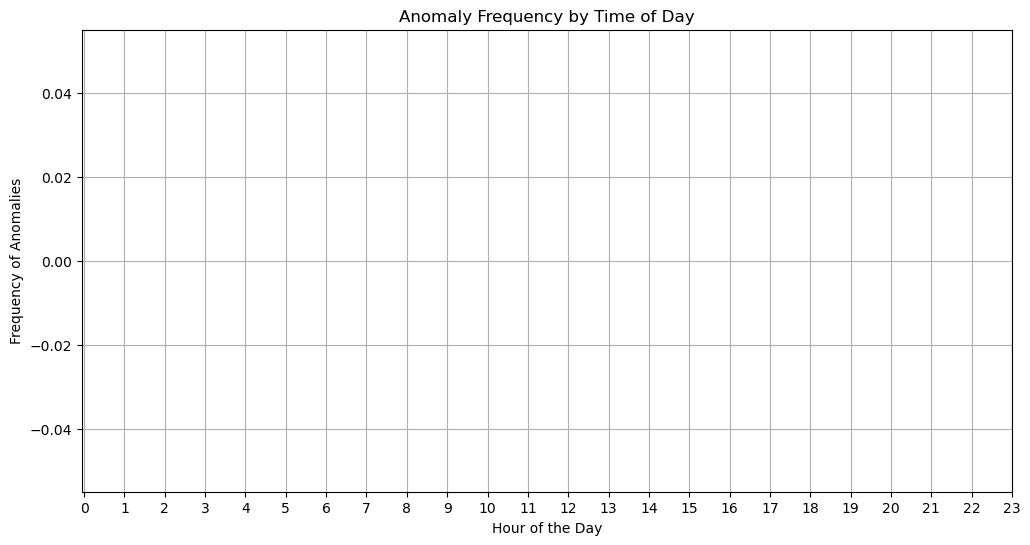

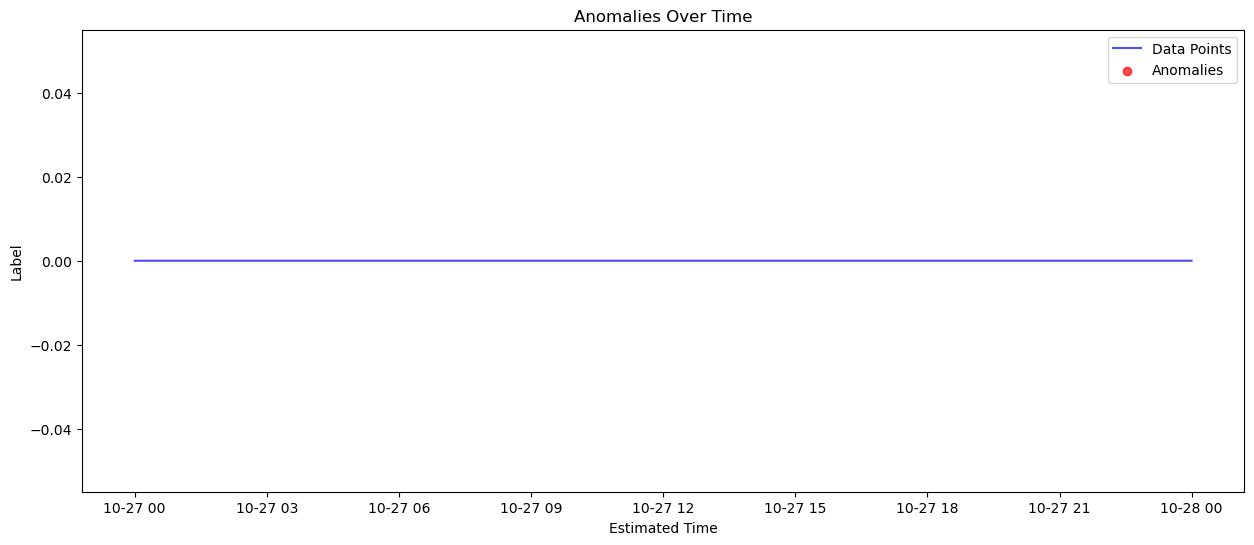

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Preprocess the data
def preprocess_data(data):
    data['mqtt.clientid'].fillna(0, inplace=True)
    data['mqtt.msgid'].fillna(0, inplace=True)

    # One-hot encode the 'ip.src' column
    encoder = OneHotEncoder()
    ip_encoded = encoder.fit_transform(data[['ip.src']]).toarray()
    ip_encoded_df = pd.DataFrame(ip_encoded, columns=encoder.get_feature_names_out(['ip.src']))

    # Normalize other numerical columns
    scaler = StandardScaler()
    data[['tcp.srcport', 'mqtt.clientid', 'mqtt.msgid']] = scaler.fit_transform(data[['tcp.srcport', 'mqtt.clientid', 'mqtt.msgid']])
    
    # Convert label to categorical
    data['label'] = data['label'].astype(int)
    labels = to_categorical(data['label'])
    
    # Combine encoded IP addresses with the rest of the data
    features = pd.concat([data.drop(['ip.src', 'label'], axis=1), ip_encoded_df], axis=1)
    
    return features, labels

# Load the CSV file
labels_csv_path = r'C:\Users\sebas\OneDrive\Desktop\SEP 769\dad-master\dad-master\capture_1910270000_labels.csv'
labels_data = pd.read_csv(labels_csv_path, delimiter=';')
processed_features, processed_labels = preprocess_data(labels_data)

# Estimate the time for each row assuming a single day dataset
def estimate_times(data):
    total_seconds_per_day = 24 * 60 * 60
    rows_per_day = len(data)
    seconds_per_row = total_seconds_per_day / rows_per_day
    start_time = datetime(2023, 10, 27)  # Assuming the start date of the capture is October 27, 2023
    data['estimated_time'] = [start_time + timedelta(seconds=i * seconds_per_row) for i in range(len(data))]
    return data

labels_data = estimate_times(labels_data)

# Generate detailed anomaly detection report
def generate_anomaly_report(data):
    # Identify anomalies
    data['hour'] = data['estimated_time'].dt.hour
    anomalies = data[data['label'] != 0]  # Assuming label 0 is normal and other values are anomalies

    # Total number of anomalies
    total_anomalies = len(anomalies)
    
    # Frequency of anomalies by hour
    anomaly_counts = anomalies['hour'].value_counts().sort_index()

    # Summary of anomalies within specific periods
    morning_anomalies = anomalies[(anomalies['hour'] >= 6) & (anomalies['hour'] < 7)]
    afternoon_anomalies = anomalies[(anomalies['hour'] >= 14) & (anomalies['hour'] < 17)]
    
    report = {
        "Total Anomalies": total_anomalies,
        "Anomaly Frequency by Hour": anomaly_counts,
        "Morning Anomalies (6-7 AM)": len(morning_anomalies),
        "Afternoon Anomalies (2-4 PM)": len(afternoon_anomalies)
    }
    
    # Print the report
    print("Anomaly Detection Report")
    print("========================")
    print(f"Total Anomalies: {total_anomalies}")
    print("\nAnomaly Frequency by Hour:")
    print(anomaly_counts)
    print(f"\nMorning Anomalies (6-7 AM): {len(morning_anomalies)}")
    print(f"Afternoon Anomalies (2-4 PM): {len(afternoon_anomalies)}")

    # Plot anomaly frequency by hour
    plt.figure(figsize=(12, 6))
    plt.bar(anomaly_counts.index, anomaly_counts.values, color='red', alpha=0.7)
    plt.xlabel('Hour of the Day')
    plt.ylabel('Frequency of Anomalies')
    plt.title('Anomaly Frequency by Time of Day')
    plt.xticks(np.arange(0, 24, 1))
    plt.grid(True)
    plt.show()

    # Plot anomalies over time
    plt.figure(figsize=(15, 6))
    plt.plot(data['estimated_time'], data['label'], 'b-', alpha=0.7, label='Data Points')
    plt.scatter(anomalies['estimated_time'], anomalies['label'], color='red', label='Anomalies', alpha=0.7)
    plt.xlabel('Estimated Time')
    plt.ylabel('Label')
    plt.title('Anomalies Over Time')
    plt.legend()
    plt.show()

generate_anomaly_report(labels_data)